<IPython.core.display.Javascript object>


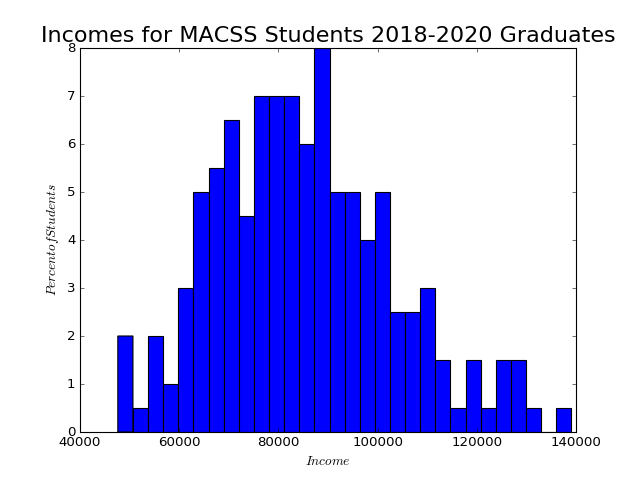

In [65]:
# 1A
import numpy as np
import matplotlib.pyplot as plt
# This next command is specifically for Jupyter Notebook
%matplotlib notebook

fig = plt.figure()
data = np.loadtxt('incomes.txt')

plt.title('Incomes for MACSS Students 2018-2020 Graduates', fontsize=20)
plt.xlabel(r'$Income$')
plt.ylabel(r'$Percent of Students$')
num_bins = 30
weights = (100.0 / data.shape[0]) * np.ones_like(data)
n, bin_cuts, patches = plt.hist(data, num_bins, weights=weights)

<IPython.core.display.Javascript object>


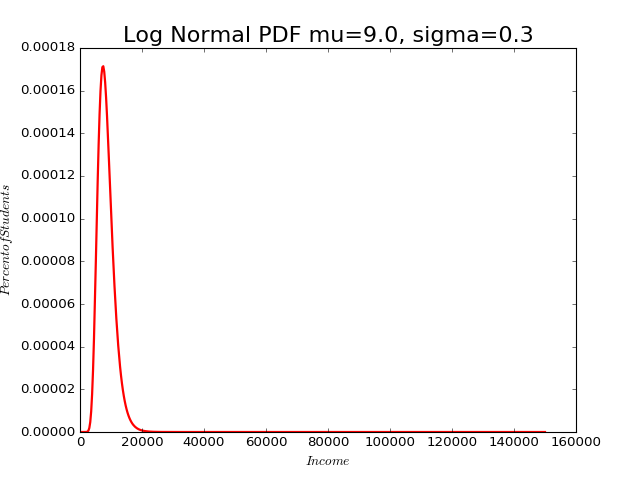

In [66]:
#1B Part 1
import numpy as np
import scipy.stats as sts
%matplotlib notebook
mu = 9.0
sigma = 0.3
data = np.loadtxt('incomes.txt')

log_normal_vals = np.random.lognormal(mean=mu, sigma=sigma, size=200)

x = np.linspace(0, 150000, 500)

plt.title('Log Normal PDF mu=9.0, sigma=0.3', fontsize=20)
plt.xlabel(r'$Income$')
plt.ylabel(r'$Percent of Students$')
plt.plot(x, sts.lognorm(s=sigma, scale=np.exp(mu)).pdf(x),linewidth=2, color='r', label='1: $\mu$=9.0,$\sigma$=0.3')


In [68]:
# 1B part 2
lognorm_dist = sts.lognorm(scale = np.exp(mu), s = sigma)
pdf = lognorm_dist.pdf(data)
ln_pdf_vals = np.log(pdf)
log_lik_val = ln_pdf_vals.sum()

print(log_lik_val)

-8298.63695601


In [72]:
# 1C
import scipy.optimize as opt
from scipy.stats import lognorm

mu_init = 9
sig_init = 0.5
np.seterr(all = 'ignore')

def crit(params, *args):
    '''
    --------------------------------------------------------------------
    Computes the negative of the log likelihood function
    --------------------------------------------------------------------
    params = (2,) vector, ([mu, sigma])
    --------------------------------------------------------------------
    '''
    mu, sigma = params
    xvals, cutoff = args
    log_lik_val = log_lik_lognorm(xvals, mu, sigma)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

def log_lik_lognorm(xvals, mu, sigma):
    '''
    --------------------------------------------------------------------
    Compute the log likelihood function for xvals
    --------------------------------------------------------------------
   '''
    
    pdf_vals = lognorm(s =sigma, scale =np.exp(mu)).pdf(xvals)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

params_init = np.array([mu_init, sig_init])
mle_args = (data, data.max())
results = opt.minimize(crit, params_init, args=(mle_args), method = "SLSQP", bounds=((None, None), (0.001, None)))

params_init = results.x
results = opt.minimize(crit, params_init, args=(mle_args), method = "BFGS", bounds=((None, None), (0.001, None)))
mu_MLE, sig_MLE = results.x
vcv_mle = results.hess_inv

print('mu %s' % mu_MLE)
print('sigma %s' % sig_MLE)
print('matrix %s' % vcv_mle)
print('log liklihood %s' % log_lik_lognorm(data, mu_MLE, sig_MLE))

mu 11.331440325
sigma 0.211674578624
matrix [[  2.23666599e-04   1.45226622e-07]
 [  1.45226622e-07   1.11970392e-04]]
log liklihood -2239.534744


/Users/benjamin/envs/python35/lib/python3.5/site-packages/scipy/optimize/_minimize.py:394: RuntimeWarning: Method BFGS cannot handle constraints nor bounds.
  RuntimeWarning)


<IPython.core.display.Javascript object>


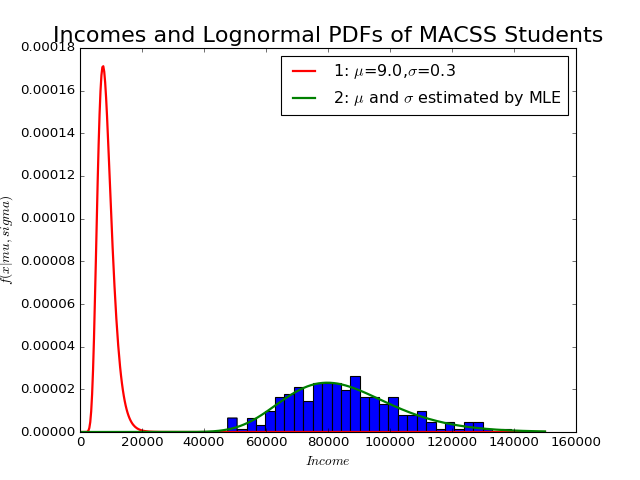

In [73]:
# PLOT 1C
fig = plt.figure()
data = np.loadtxt('incomes.txt')

x = np.linspace(0, 150000, 500)

plt.title('Incomes and Lognormal PDFs of MACSS Students', fontsize=20)
plt.xlabel(r'$Income$')
plt.ylabel(r'$f(x|mu, sigma)$')

plt.hist(data, bins = 30, normed = True)
plt.plot(x, lognorm(s=sigma, scale=np.exp(mu)).pdf(x),linewidth=2, color='r', label='1: $\mu$=9.0,$\sigma$=0.3')
plt.plot(x, lognorm(s=sig_MLE, scale=np.exp(mu_MLE)).pdf(x),linewidth=2, color='G', label='2: $\mu$ and $\sigma$ estimated by MLE')
plt.legend(loc='upper right')

In [74]:
#1D
log_lik_h0 = log_lik_lognorm(data, mu, sigma)
log_lik_mle = log_lik_lognorm(data, mu_MLE, sig_MLE)
LR_val = 2 * (log_lik_mle - log_lik_h0)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)
print(pval_h0)

0.0


In [75]:
# 1E
print(lognorm.sf(100000, sig_MLE, loc= mu_MLE, scale = np.exp(mu_MLE)))
print(lognorm.cdf(75000, sig_MLE, loc= mu_MLE, scale = np.exp(mu_MLE)))

0.19576590961
0.307688568527


In [85]:
# 2A
import pandas as pd
data= pd.read_csv('sick.txt', header = 0)

def norm_pdf(xvals, mu, sigma):        
    pdf_vals    = (1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (xvals - mu)**2 / (2 * sigma**2))) 
    return pdf_vals

def log_like_sick(data, b0, b1, b2, b3, sigma):
    error       = data['sick'] - (b0+ b1*data['age'] + b2*data['children']+ b3*data['avgtemp_winter'])
    pdf_vals    = norm_pdf(error, 0, sigma)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val

def crit_sick(params, *args):
    b0, b1, b2, b3,sigma = params
    data            = args[0]
    log_lik_val     = log_like_sick(data, b0, b1, b2, b3, sigma)
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val

# Find MLE
beta0 = 1
beta1 = 0
beta2 = 0
beta3 = 0
sig = .1
params_init = np.array([beta0, beta1, beta2, beta3, sig])
bounds      = ((None, None),(None, None),(None, None),(None, None),(0.001, None))
results     = opt.minimize(crit_sick, params_init, args=data, method = "SLSQP", bounds=bounds)
b0, b1, b2, b3, sigma = results.x
results     = opt.minimize(crit_sick,  results.x, args=data, method = "L-BFGS-B", bounds=bounds)
b0, b1, b2, b3, sigma = results.x
print(b0, b1, b2, b3, sigma)
print(results.hess_inv.todense())
print(log_like_sick(data, *results.x))

0.251190341665 0.012920521528 0.40067003356 -0.00997627504703 0.0400744161277
[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.]]
459.048011945


In [86]:
# 2B
log_lik_h0  = log_like_sick(data, 1, 0, 0, 0, 0.1)
log_lik_mle = log_like_sick(data, *results.x)
LR_val      = 2 * (log_lik_mle - log_lik_h0)
pval_h0     = 1.0 - sts.chi2.cdf(LR_val, 5)
print(pval_h0)

0.0
